In [2]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import seaborn as sns

from iterstrat.ml_stratifiers import MultilabelStratifiedKFold



from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.preprocessing import QuantileTransformer

In [3]:

data_dir = '../data/01_raw'
os.listdir(data_dir)

['train_targets_scored.csv',
 'sample_submission.csv',
 '.gitkeep',
 'train_features.csv',
 'test_features.csv',
 'train_targets_nonscored.csv']

In [4]:
train_features = pd.read_csv(data_dir+'/train_features.csv')
train_targets_scored = pd.read_csv(data_dir+'/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv(data_dir+'/train_targets_nonscored.csv')

test_features = pd.read_csv(data_dir+'/test_features.csv')
sample_submission = pd.read_csv(data_dir+'/sample_submission.csv')

In [5]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]

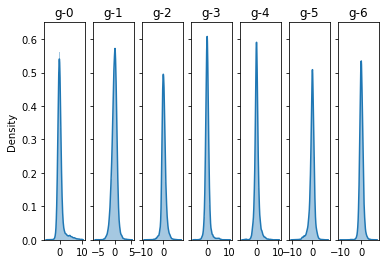

In [6]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

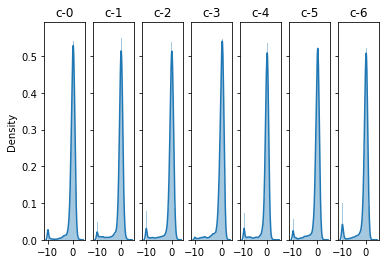

In [7]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

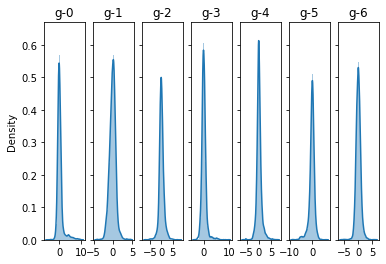

In [8]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

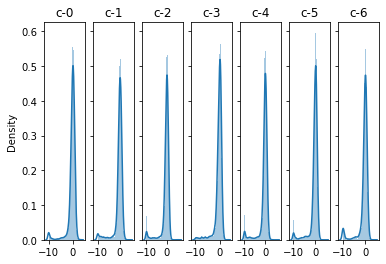

In [9]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

In [10]:
#RankGauss

for col in (GENES + CELLS):

    transformer = QuantileTransformer(n_quantiles=100,random_state=0, output_distribution="normal")
    vec_len = len(train_features[col].values)
    vec_len_test = len(test_features[col].values)
    raw_vec = train_features[col].values.reshape(vec_len, 1)
    transformer.fit(raw_vec)

    train_features[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test_features[col] = transformer.transform(test_features[col].values.reshape(vec_len_test, 1)).reshape(1, vec_len_test)[0]

In [11]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)

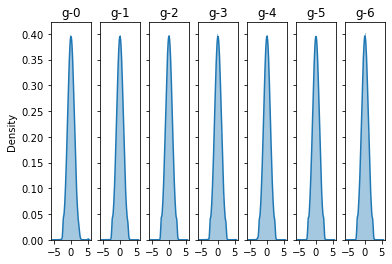

In [12]:
gnum = train_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(train_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

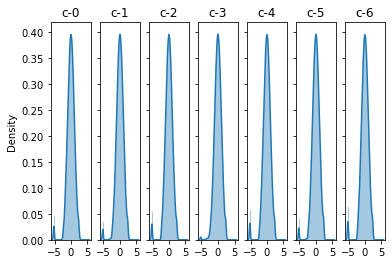

In [13]:
cnum = train_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(train_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

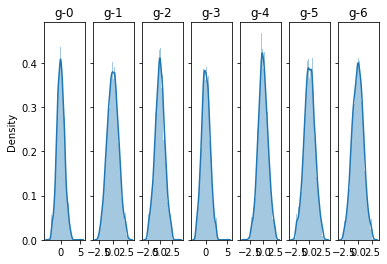

In [14]:
gnum = test_features[GENES].shape[1]
graphs = []

for i in range(0, gnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=771:
            break
        graph = sns.distplot(test_features[GENES].values[:,item], ax=axs[k])
        graph.set_title(f"g-{item}")
        graphs.append(graph)

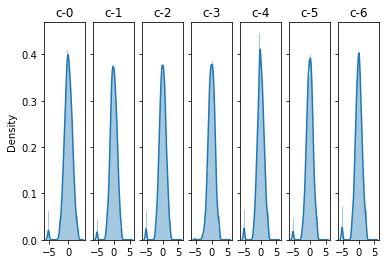

In [15]:
cnum = test_features[CELLS].shape[1]
graphs = []

for i in range(0, cnum -1 , 7):
    #for least display.... 
    if i >= 3:
        break
    idxs = list(np.array([0, 1, 2, 3, 4, 5, 6]) + i)
    

    fig, axs = plt.subplots(1, 7, sharey=True)
    for k, item in enumerate(idxs):
        if item >=100:
            break
        graph = sns.distplot(test_features[CELLS].values[:,item], ax=axs[k])
        graph.set_title(f"c-{item}")
        graphs.append(graph)

In [16]:
# GENES
n_comp = 600  #<--Update

data = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(test_features[GENES])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[GENES]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_G-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_G-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(GENES))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)

In [17]:
#CELLS
n_comp = 50  #<--Update

data = pd.concat([pd.DataFrame(train_features[CELLS]), pd.DataFrame(test_features[CELLS])])
data2 = (PCA(n_components=n_comp, random_state=42).fit_transform(data[CELLS]))
train2 = data2[:train_features.shape[0]]; test2 = data2[-test_features.shape[0]:]

train2 = pd.DataFrame(train2, columns=[f'pca_C-{i}' for i in range(n_comp)])
test2 = pd.DataFrame(test2, columns=[f'pca_C-{i}' for i in range(n_comp)])

# drop_cols = [f'c-{i}' for i in range(n_comp,len(CELLS))]
train_features = pd.concat((train_features, train2), axis=1)
test_features = pd.concat((test_features, test2), axis=1)

In [18]:
train_features.shape

(23814, 1526)

In [19]:
from sklearn.feature_selection import VarianceThreshold


var_thresh = VarianceThreshold(0.8)  #<-- Update
data = train_features.append(test_features)
data_transformed = var_thresh.fit_transform(data.iloc[:, 4:])

train_features_transformed = data_transformed[ : train_features.shape[0]]
test_features_transformed = data_transformed[-test_features.shape[0] : ]


train_features = pd.DataFrame(train_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                              columns=['sig_id','cp_type','cp_time','cp_dose'])

train_features = pd.concat([train_features, pd.DataFrame(train_features_transformed)], axis=1)


test_features = pd.DataFrame(test_features[['sig_id','cp_type','cp_time','cp_dose']].values.reshape(-1, 4),\
                             columns=['sig_id','cp_type','cp_time','cp_dose'])

test_features = pd.concat([test_features, pd.DataFrame(test_features_transformed)], axis=1)

train_features.shape

(23814, 1040)

In [20]:
train = train_features.merge(train_targets_scored, on='sig_id')
train = train.merge(train_targets_nonscored, on='sig_id')
train = train[train['cp_type']!='ctl_vehicle'].reset_index(drop=True)
test = test_features[test_features['cp_type']!='ctl_vehicle'].reset_index(drop=True)

target_scored = train[train_targets_scored.columns]
target_nscored = train[train_targets_nonscored.columns]

In [21]:
train = train.drop('cp_type', axis=1)
test = test.drop('cp_type', axis=1)

In [22]:
train

,sig_id,cp_time,cp_dose,0,1,2,3,4,5,6,...,ve-cadherin_antagonist,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor
0,id_000644bb2,24,D1,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,72,D1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,48,D1,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,48,D1,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,72,D2,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,id_fff8c2444,72,D1,0.237856,-1.228203,0.218376,-0.365976,-0.330177,0.569243,-0.150978,...,0,0,0,0,0,0,0,0,0,0
21944,id_fffb1ceed,24,D2,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,...,0,0,0,0,0,0,0,0,0,0
21945,id_fffb70c0c,24,D2,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,...,0,0,0,0,0,0,0,0,0,0
21946,id_fffcb9e7c,24,D1,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,...,0,0,0,0,0,0,0,0,0,0


In [23]:
target_scored_cols = target_scored.drop('sig_id', axis=1).columns.values.tolist()
target_nscored_cols = target_nscored.drop('sig_id', axis=1).columns.values.tolist()

In [24]:
folds = train.copy()

mskf = MultilabelStratifiedKFold(n_splits=7)

for f, (t_idx, v_idx) in enumerate(mskf.split(X=train, y=target_scored)):
    folds.loc[v_idx, 'kfold'] = int(f)

folds['kfold'] = folds['kfold'].astype(int)
folds

,sig_id,cp_time,cp_dose,0,1,2,3,4,5,6,...,vesicular_monoamine_transporter_inhibitor,vitamin_k_antagonist,voltage-gated_calcium_channel_ligand,voltage-gated_potassium_channel_activator,voltage-gated_sodium_channel_blocker,wdr5_mll_interaction_inhibitor,wnt_agonist,xanthine_oxidase_inhibitor,xiap_inhibitor,kfold
0,id_000644bb2,24,D1,1.134849,0.907687,-0.416385,-0.966814,-0.254723,-1.017473,-1.364787,...,0,0,0,0,0,0,0,0,0,5
1,id_000779bfc,72,D1,0.119282,0.681738,0.272399,0.080113,1.205169,0.686517,0.313396,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,48,D1,0.779973,0.946463,1.425350,-0.132928,-0.006122,1.492493,0.235577,...,0,0,0,0,0,0,0,0,0,6
3,id_0015fd391,48,D1,-0.734910,-0.274641,-0.438509,0.759097,2.346330,-0.858153,-2.288417,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,72,D2,-0.452718,-0.477513,0.972316,0.970731,1.463427,-0.869555,-0.375501,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21943,id_fff8c2444,72,D1,0.237856,-1.228203,0.218376,-0.365976,-0.330177,0.569243,-0.150978,...,0,0,0,0,0,0,0,0,0,5
21944,id_fffb1ceed,24,D2,0.209361,-0.022389,-0.235888,-0.796989,-0.674009,0.919312,0.735603,...,0,0,0,0,0,0,0,0,0,1
21945,id_fffb70c0c,24,D2,-1.911021,0.587228,-0.588417,1.296405,-1.002640,0.850589,-0.304313,...,0,0,0,0,0,0,0,0,0,5
21946,id_fffcb9e7c,24,D1,0.816407,0.417618,0.431631,0.300617,1.070346,-0.024189,0.048942,...,0,0,0,0,0,0,0,0,0,1


In [25]:
print(train.shape)
print(folds.shape)
print(test.shape)
print(target_scored.shape)
print(target_nscored.shape)
print(sample_submission.shape)

(21948, 1647)
(21948, 1648)
(3624, 1039)
(21948, 207)
(21948, 403)
(3982, 207)


In [26]:
class TrainDataset:
    def __init__(self, features, targets_scored,targets_nscored):
        self.features = features
        self.targets_scored = targets_scored
        self.targets_nscored = targets_nscored
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float),
            'y_scored' : torch.tensor(self.targets_scored[idx, :], dtype=torch.float),
            'y_nscored' : torch.tensor(self.targets_nscored[idx, :], dtype=torch.float)           
        }
        return dct

class ValidDataset:
    def __init__(self, features, targets_scored):
        self.features = features
        self.targets_scored = targets_scored
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float),
            'y_scored' : torch.tensor(self.targets_scored[idx, :], dtype=torch.float),          
        }
        return dct
    
class TestDataset:
    def __init__(self, features):
        self.features = features
        
    def __len__(self):
        return (self.features.shape[0])
    
    def __getitem__(self, idx):
        dct = {
            'x' : torch.tensor(self.features[idx, :], dtype=torch.float)
        }
        return dct

In [27]:
def train_fn(model, optimizer, scheduler, loss_fn, dataloader, device):
    model.train()
    final_loss = 0
    
    for data in dataloader:
        optimizer.zero_grad()
        inputs, targets1, targets2 = data['x'].to(device), data['y_scored'].to(device), data['y_nscored'].to(device)
#         print(inputs.shape)
        outputs1,outputs2 = model(inputs)
        loss1 = loss_fn(outputs1, targets1)
        loss2 = loss_fn(outputs2, targets2)
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()
        scheduler.step()
        
        final_loss += loss.item()
        
    final_loss /= len(dataloader)
    
    return final_loss


def valid_fn(model, loss_fn, dataloader, device):
    model.eval()
    final_loss = 0
    valid_preds = []
    
    for data in dataloader:
        inputs, targets = data['x'].to(device), data['y_scored'].to(device)
        outputs,_ = model(inputs)
        loss = loss_fn(outputs, targets)
        
        final_loss += loss.item()
        valid_preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    final_loss /= len(dataloader)
    valid_preds = np.concatenate(valid_preds)
    
    return final_loss, valid_preds

def inference_fn(model, dataloader, device):
    model.eval()
    preds = []
    
    for data in dataloader:
        inputs = data['x'].to(device)

        with torch.no_grad():
            outputs,_ = model(inputs)
        
        preds.append(outputs.sigmoid().detach().cpu().numpy())
        
    preds = np.concatenate(preds)
    
    return preds

In [28]:
import torch
from torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F

class SmoothBCEwLogits(_WeightedLoss):
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1
        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
        return targets

    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

In [29]:
class Model(nn.Module):
    def __init__(self, num_features, num_targets_scored,num_targets_nscored, hidden_size):
        super(Model, self).__init__()
        self.batch_norm1 = nn.BatchNorm1d(num_features)
        self.dense1 = nn.utils.weight_norm(nn.Linear(num_features, hidden_size))
        
        self.batch_norm2 = nn.BatchNorm1d(hidden_size)
        self.dropout2 = nn.Dropout(0.2619422201258426)
        self.dense2 = nn.utils.weight_norm(nn.Linear(hidden_size, hidden_size))


        self.batch_norm2b = nn.BatchNorm1d(hidden_size)
        self.dropout2b = nn.Dropout(0.2619422201258426)
        self.dense2b = nn.utils.weight_norm(nn.Linear(hidden_size, hidden_size))
        
        self.batch_norm3 = nn.BatchNorm1d(hidden_size)
        self.dropout3 = nn.Dropout(0.2619422201258426)
        self.dense3 = nn.utils.weight_norm(nn.Linear(hidden_size, num_targets_scored))
        self.dense4 = nn.utils.weight_norm(nn.Linear(hidden_size, num_targets_nscored))
    
    def recalibrate_layer(self, layer):
        if(torch.isnan(layer.weight_v).sum() > 0):
            print ('recalibrate layer.weight_v')
            layer.weight_v = torch.nn.Parameter(torch.where(torch.isnan(layer.weight_v), torch.zeros_like(layer.weight_v), layer.weight_v))
            layer.weight_v = torch.nn.Parameter(layer.weight_v + 1e-7)

        if(torch.isnan(layer.weight).sum() > 0):
            print ('recalibrate layer.weight')
            layer.weight = torch.where(torch.isnan(layer.weight), torch.zeros_like(layer.weight), layer.weight)
            layer.weight += 1e-7

    def forward(self, x):
        x = self.batch_norm1(x)
        self.recalibrate_layer(self.dense1)
        x = F.leaky_relu(self.dense1(x))
        
        x = self.batch_norm2(x)
        x = self.dropout2(x)
        self.recalibrate_layer(self.dense2)
        x = F.leaky_relu(self.dense2(x))

        x = self.batch_norm2b(x)
        x = self.dropout2b(x)
        self.recalibrate_layer(self.dense2b)
        x = F.leaky_relu(self.dense2b(x))
        
        x = self.batch_norm3(x)
        x= self.dropout3(x)
        self.recalibrate_layer(self.dense3)
        x1 = self.dense3(x)
        self.recalibrate_layer(self.dense4)
        x2 = self.dense4(x)
        return x1,x2
    
class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        with torch.no_grad():
            # true_dist = pred.data.clone()
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))

In [30]:
def process_data(data):
    data = pd.get_dummies(data, columns=['cp_time','cp_dose'])
    return data

In [31]:
feature_cols = [c for c in process_data(folds).columns if c not in (target_scored_cols + target_nscored_cols)]
feature_cols = [c for c in feature_cols if c not in ['kfold','sig_id']]
len(feature_cols)

1041

In [32]:
# HyperParameters

DEVICE = ('cuda' if torch.cuda.is_available() else 'cpu')
EPOCHS = 30
#EPOCHS = 25
BATCH_SIZE = 128
LEARNING_RATE = 1e-3
WEIGHT_DECAY = 1e-5
NFOLDS = 7           
EARLY_STOPPING_STEPS = 10
EARLY_STOP = False

num_features=len(feature_cols)
num_targets_scored=len(target_scored_cols)
num_targets_nscored=len(target_nscored_cols)
#hidden_size=1500
hidden_size=1000


In [33]:
def run_training(fold, seed):
    
    seed_everything(seed)
    
    train = process_data(folds)
    test_ = process_data(test)
    
    trn_idx = train[train['kfold'] != fold].index
    val_idx = train[train['kfold'] == fold].index
    
    train_df = train[train['kfold'] != fold].reset_index(drop=True)
    valid_df = train[train['kfold'] == fold].reset_index(drop=True)
    
    x_train, y_scored_train, y_nscored_train  = train_df[feature_cols].values, train_df[target_scored_cols].values, train_df[target_nscored_cols].values
    x_valid, y_scored_valid =  valid_df[feature_cols].values, valid_df[target_scored_cols].values
    
    train_dataset = TrainDataset(x_train, y_scored_train, y_nscored_train)
    valid_dataset = ValidDataset(x_valid, y_scored_valid)
    trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    validloader = torch.utils.data.DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model(
        num_features=num_features,
        num_targets_scored=num_targets_scored,
        num_targets_nscored=num_targets_nscored,
        hidden_size=hidden_size,
    )
    
    model.to(DEVICE)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer=optimizer,pct_start=0.1, div_factor=1e4, final_div_factor=1e5,
                                              max_lr=1e-2, epochs=EPOCHS, steps_per_epoch=len(trainloader))
    
    loss_fn = nn.BCEWithLogitsLoss()
    loss_tr = SmoothBCEwLogits(smoothing =0.001)
    
    early_stopping_steps = EARLY_STOPPING_STEPS
    early_step = 0
   
    oof = np.zeros((len(train), target_scored.iloc[:, 1:].shape[1]))
    best_loss = np.inf
    
    for epoch in range(EPOCHS):
        
        train_loss = train_fn(model, optimizer,scheduler, loss_tr, trainloader, DEVICE)
        valid_loss, valid_preds = valid_fn(model, loss_fn, validloader, DEVICE)
        print(f"FOLD: {fold}, EPOCH: {epoch}, train_loss: {train_loss}, valid_loss: {valid_loss}")
        
        if valid_loss < best_loss:
            
            best_loss = valid_loss
            oof[val_idx] = valid_preds
            torch.save(model.state_dict(), f"FOLD{fold}_.pth")
        
        elif(EARLY_STOP == True):
            
            early_step += 1
            if (early_step >= early_stopping_steps):
                break
            
    
    #--------------------- PREDICTION---------------------
    x_test = test_[feature_cols].values
    testdataset = TestDataset(x_test)
    testloader = torch.utils.data.DataLoader(testdataset, batch_size=BATCH_SIZE, shuffle=False)
    
    model = Model(
        num_features=num_features,
        num_targets_scored=num_targets_scored,
        num_targets_nscored=num_targets_nscored,
        hidden_size=hidden_size,

    )
    
    model.load_state_dict(torch.load(f"FOLD{fold}_.pth"))
    model.to(DEVICE)
    
    predictions = np.zeros((len(test_), target_scored.iloc[:, 1:].shape[1]))
    predictions = inference_fn(model, testloader, DEVICE)
    
    return oof, predictions

In [34]:
def run_k_fold(NFOLDS, seed):
    oof = np.zeros((len(train), len(target_scored_cols)))
    predictions = np.zeros((len(test), len(target_scored_cols)))
    
    for fold in range(NFOLDS):
        oof_, pred_ = run_training(fold, seed)
        
        predictions += pred_ / NFOLDS
        oof += oof_
        
    return oof, predictions

In [275]:
# Averaging on multiple SEEDS

#SEED = [0,1,2,3,4,5,6] #<-- Update
SEED = [0]
oof = np.zeros((len(train), len(target_scored_cols)))
predictions = np.zeros((len(test), len(target_scored_cols)))

for seed in SEED:
    
    oof_, predictions_ = run_k_fold(NFOLDS, seed)
    oof += oof_ / len(SEED)
    predictions += predictions_ / len(SEED)

train[target_scored_cols] = oof
test[target_scored_cols] = predictions

RuntimeError: CUDA error: unspecified launch failure

In [266]:
valid_results = train_targets_scored.drop(columns=target_scored_cols).merge(train[['sig_id']+target_scored_cols], on='sig_id', how='left').fillna(0)



y_true = train_targets_scored[target_scored_cols].values
y_pred = valid_results[target_scored_cols].values

score = 0
for i in range(len(target_scored_cols)):
    score_ = log_loss(y_true[:, i], y_pred[:, i])
    score += score_ / target_scored.shape[1]
    
print("CV log_loss: ", score)

CV log_loss:  0.014708188641129298


In [268]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true,y_pred))

0.8049970465383997


In [ ]:
#CV log_loss:  0.014772181976560779 - hidden size 1500
#CV log loss:  0.014761207506656483 - hidden size 1600
#CV log_loss:  0.014757089674479135 - hidden size 1600 + recalibrate layers
#CV log_loss:  0.014798489345352649 - hidden size 1600 + recalibrate layers + 30epochs
#CV log_loss:  0.014993945755985132 - hidden size 1600 + recalibrate layers - batch size 256
#CV log_loss:  0.014925429807583115 - hidden size 1600 + recalibrate layers - batch size 256 + 50 epcohs
#CV log_loss:  0.01501367781064934  - hidden size 1600 + recalibrate layers - batch size 256 + 50 epcohs div_factor=1e4
#CV log_loss:  0.015038120295874759 - hidden size 1600 + recalibrate layers - batch size 256 + 50 epcohs pct_start=0.2
#CV log_loss:  0.014925429807583115 - hidden size 1600 + recalibrate layers - batch size 256 + 50 epcohs 2*lr
#CV log_loss:  0.014862676189325522 - hidden size 2000 + recalibrate layers - batch size 256 + 50 epcohs
#CV log_loss:  0.014805892283163887 - hidden size 2000 + recalibrate layers - batch size 256 + 70 epcohs

#CV log_loss:  0.015298968285739336 - hidden size 1600 + recalibrate layers - batch size 64

#CV log_loss:  0.014708188641129298 - hidden size 1000 + recalibrate layers + 30 epochs